In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyecharts
import os
print(pyecharts.__version__)

1.9.1


In [3]:
def file_name_walk(file_dir):
    for root, dirs, files in os.walk(file_dir):
        print("root", root)  # 当前目录路径
        print("dirs", dirs)  # 当前路径下所有子目录
        print("files", files)  # 当前路径下所有非目录子文件


In [4]:
files_1 = os.listdir("ProblemCData\CO2 Emission")
files_2 = os.listdir("ProblemCData\State")

In [342]:
summary_2016 = pd.read_excel('ProblemCData/summary_2016.xlsx').iloc[:-6,:]
summary = summary_2016.drop(index=[0,1],axis=0)
summary.head()

,Table 1. State emissions by year (1990 - 2016),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29
2,Alabama,111.092122,115.466992,122.726107,127.038855,125.120631,132.958723,139.035875,135.526720,135.547782,...,121.948916,134.614539,131.646689,125.112394,122.512730,124.751678,121.682353,115.721763,0.041674,4.629641
3,Alaska,35.054100,35.685200,37.298110,36.969789,36.825473,41.503806,42.450252,42.393320,43.754118,...,38.588620,39.465576,39.306465,38.829165,36.659247,35.795496,36.696731,35.101593,0.001355,0.047493
4,Arizona,63.491486,64.398631,67.532477,69.649832,72.475134,67.372781,69.177065,72.138275,77.575691,...,94.836579,96.637581,94.617175,92.780880,96.450602,94.371266,92.111361,87.484845,0.377899,23.993359
5,Arkansas,51.477171,50.380231,52.232946,51.171105,55.153835,58.564112,61.175920,59.981530,61.743580,...,62.419653,66.723731,68.145755,67.036206,69.343168,69.892555,60.011481,62.754316,0.219071,11.277145
6,California,362.964725,350.440893,356.370525,344.135973,360.699934,349.382009,347.889790,349.521529,362.299332,...,373.800883,367.817653,353.224905,358.604029,360.716723,357.499077,365.409907,363.342966,0.001042,0.37824


In [324]:
# 重设列名
state_index = np.array('State')
state_year = np.arange(1990,2017)
state_appendix = np.array(['Percent','Absolute'])
column = np.hstack((state_index,state_year,state_appendix))
summary.columns = column
# 重置索引
summary = summary.reset_index(drop=True)
print(summary.shape)
summary.head()

(51, 30)


,State,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2009,2010,2011,2012,2013,2014,2015,2016,Percent,Absolute
0,Alabama,111.092122,115.466992,122.726107,127.038855,125.120631,132.958723,139.035875,135.526720,135.547782,...,121.948916,134.614539,131.646689,125.112394,122.512730,124.751678,121.682353,115.721763,0.041674,4.629641
1,Alaska,35.054100,35.685200,37.298110,36.969789,36.825473,41.503806,42.450252,42.393320,43.754118,...,38.588620,39.465576,39.306465,38.829165,36.659247,35.795496,36.696731,35.101593,0.001355,0.047493
2,Arizona,63.491486,64.398631,67.532477,69.649832,72.475134,67.372781,69.177065,72.138275,77.575691,...,94.836579,96.637581,94.617175,92.780880,96.450602,94.371266,92.111361,87.484845,0.377899,23.993359
3,Arkansas,51.477171,50.380231,52.232946,51.171105,55.153835,58.564112,61.175920,59.981530,61.743580,...,62.419653,66.723731,68.145755,67.036206,69.343168,69.892555,60.011481,62.754316,0.219071,11.277145
4,California,362.964725,350.440893,356.370525,344.135973,360.699934,349.382009,347.889790,349.521529,362.299332,...,373.800883,367.817653,353.224905,358.604029,360.716723,357.499077,365.409907,363.342966,0.001042,0.37824


## Picture 1

In [8]:
# 2016年总排放量排名
x_data = summary['State']
y_data = summary['2016']
# 将数据转换为列表加元组的格式（[(key1, value1), (key2, value2)]）
data=[list(z) for z in zip(x_data, y_data)]
# 数据排序
data.sort(key=lambda x: x[1])

In [9]:
# 微调数值，使图片结构更加合理清晰
for i in range(len(data)):
    if data[i][0]=='Texas':
        print(i)
        data[i][1] = '550'
    if data[i][0]=='California':
        print(i)
        data[i][1] = '320'

49
50


In [10]:
from pyecharts.charts import Pie
from pyecharts import options as opts
from pyecharts.globals import ThemeType
from pyecharts.render import make_snapshot

# 创建饼形图并初始化配置项
fig = Pie(init_opts=opts.InitOpts(
    width='800px', height='500px', theme=ThemeType.ESSOS, bg_color='white'))

# 为饼形图添加数据
fig.add(
    series_name="States",  # 系列名称
    data_pair=data,  # 系列数据, 格式为 [(key1, value1), (key2, value2)]
    radius=["5%", "80%"],  #内外半径
    center=["50%", "50%"],  # 位置
    rosetype='radius',  # 南丁格尔图
    is_clockwise=False,  # 饼图的扇区是否是顺时针排布
    color='auto')

# 设置全局配置项
fig.set_global_opts(
    legend_opts=opts.LegendOpts(is_show=False),  # 不显示Legend图例
    visualmap_opts=opts.VisualMapOpts  # 视觉映射
    (
        is_show=False,  # 不显示映射配置
        type_='size',  # 映射过渡类型,选择size
    ))

# 设置系列配置项
fig.set_series_opts(label_opts=opts.LabelOpts(
    is_show=True,  # 显示标签
    position='left',  # 标签位置
    font_style='oblique',  # 字体风格
    font_weight='bold',  # 字体粗细
    font_family='Arial',  # 字体系列
    margin=15,
    font_size=11)  # 字体大小
                    )

# Jupyternotebook渲染图片
fig.render_notebook()

In [356]:
from snapshot_selenium import snapshot
# 渲染图表到HTML文件,存放在程序所在目录下
#fig.render("mypie1.html")
# 渲染图表为图片
make_snapshot(engine=snapshot,file_name=fig.render(),output_name='总排放量排名.jpeg')

## Picture 2
### 折线版

In [319]:
# 2016相对1990排放量变化量
data = summary.copy()
data = data.loc[:, ['State', 'Percent']]
data['Percent'] = data['Percent'] * 100
data = data.sort_values(by='Percent')
# 截取
positon = np.hstack((np.arange(0, 10), np.arange(41, 51))).tolist()
y_label = np.hstack((np.array(' '), data.iloc[:10, 0].to_numpy(),
                     np.array(' '), data.iloc[41:, 0].to_numpy()))
x_data = data.iloc[positon, 1].to_numpy()


C:\Users\Xu\AppData\Local\Temp/ipykernel_3036/1089992465.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  labels = ax.set_xticklabels(labels=y_label, rotation=90)


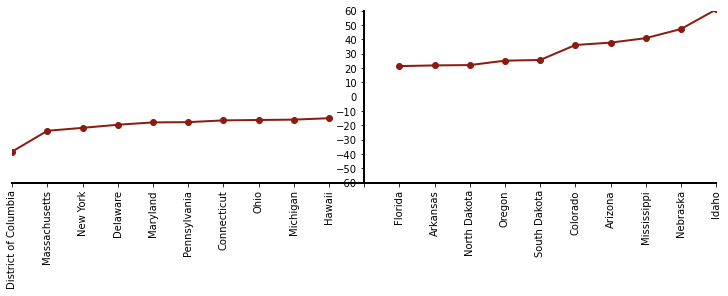

In [320]:
fig, ax = plt.subplots(figsize=(10, 4), layout='constrained')

# 去除顶部和右边坐标轴
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# 将左部坐标轴移动到中间
ax.spines['left'].set_position('center')
# 修改坐标轴粗细和字体大小
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
# 设置
ax.tick_params(labelsize=10)

# 绘制折线图
f1, = ax.plot(np.arange(-10, 0), x_data[:10], '-o', color='#891C13', lw=2)
f2, = ax.plot(0, 0, '-o', color='white', lw=2)
f3, = ax.plot(np.arange(1, 11), x_data[10:], '-o', color='#891C13', lw=2)

from matplotlib.pyplot import MultipleLocator
#从pyplot导入MultipleLocator类，这个类用于设置刻度间隔
x_major_locator = MultipleLocator(1)
#把x轴的刻度间隔设置为1，并存在变量里
y_major_locator = MultipleLocator(10)
#把y轴的刻度间隔设置为10，并存在变量里
#把x轴的主刻度设置为1的倍数
ax.xaxis.set_major_locator(x_major_locator)
#把y轴的主刻度设置为1的倍数
ax.yaxis.set_major_locator(y_major_locator)
#设置xy轴的范围
ax.set_xlim(-10, 10)
ax.set_ylim(-60, 60)
labels = ax.set_xticklabels(labels=y_label, rotation=90)

### 柱状图+折线版

In [321]:
# 2016相对1990排放量变化量
data = summary.copy()
data = data.loc[:, ['State', 'Percent']]
data['Percent'] = data['Percent'] * 100
data = data.sort_values(by='Percent')
# 截取
positon = np.hstack((np.arange(0, 10), np.arange(41, 51))).tolist()
y_label = np.hstack((data.iloc[:10, 0].to_numpy(),
                     np.array(' '), data.iloc[41:, 0].to_numpy()))
x_data = np.hstack((data.iloc[:10,1].to_numpy(),np.array(0),data.iloc[41:,1].to_numpy()))


C:\Users\Xu\AppData\Local\Temp/ipykernel_3036/1241322727.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  labels = ax.set_xticklabels(labels=y_label, rotation=90)


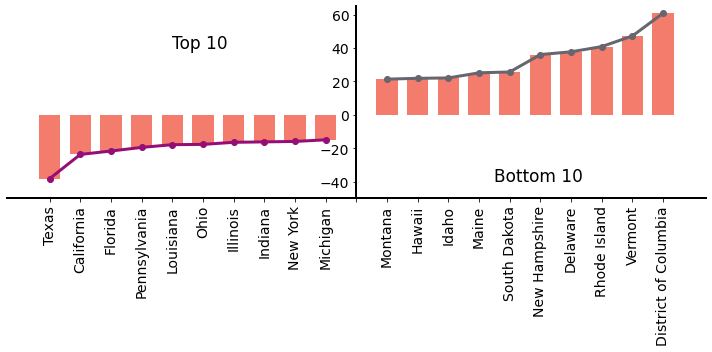

In [498]:
fig, ax = plt.subplots(figsize=(10, 5))

# 去除顶部和右边坐标轴
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# 将左部坐标轴移动到中间
ax.spines['left'].set_position('center')
# 修改坐标轴粗细和字体大小
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
# 设置坐标轴字体粗细
ax.tick_params(labelsize=14)
# 绘制柱状图
ax.bar(y_label.tolist(), x_data, width=0.7, color='#F37C6C')
# 绘制折线图
f1, = ax.plot(np.arange(0, 10), x_data[:10], '-o', color='#940E76', lw=3)
f3, = ax.plot(np.arange(11, 21), x_data[11:], '-o', color='#67656D', lw=3)
# 加上文字
ax.text(4, 40, 'Top 10', fontsize=17)
ax.text(14.5, -40, 'Bottom 10', fontsize=17)
#设置xy轴的范围
ax.set_ylim(-50, 65)
labels = ax.set_xticklabels(labels=y_label, rotation=90)
plt.tight_layout()
plt.savefig(
    '排放量降低率排名.jpg',
    dpi=300,
)

## Pictrue 3

In [489]:
fuel = pd.read_excel('ProblemCData/fuels_2016.xlsx').iloc[3:-2, :]
column = [
    'State', 'Coal', 'Petroleum', 'Natural gas', 'Total', 'Coal',
    'Shares Petroleum', 'Natural gas'
]
fuel.columns = column
# 重置索引
fuel = fuel.reset_index(drop=True)
print(fuel.shape)
# 选择排名前十和倒十的所有州
fuel_state_up = fuel.sort_values(by='Total', ascending=False).iloc[:10, :]
fuel_state_down = fuel.sort_values(by='Total', ascending=False).iloc[-10:, :]
# 重置索引
fuel_state_up_ = fuel_state_up.reset_index(drop=True)
fuel_state_down = fuel_state_down.reset_index(drop=True)

# 微调使数值更清晰
fuel_state_down.loc[1, 'Natural gas'] = 1.5
fuel_state_down.loc[2, 'Coal'] = 0.7
fuel_state_down.loc[2, 'Natural gas'] = 6
fuel_state_down

(51, 8)


,State,Coal,Petroleum,Natural gas,Total,Coal,Shares Petroleum,Natural gas
0,Montana,15.29087,11.052955,4.11534,30.459166,0.502012,0.362878,0.13511
1,Hawaii,1.551589,16.884229,1.5,18.444466,0.084122,0.915409,1.5
2,Idaho,0.7,12.298536,6,18.38191,0.7,0.669057,6
3,Maine,0.207006,13.362225,2.892543,16.461775,0.012575,0.811712,0.175713
4,South Dakota,2.516145,7.937385,4.541491,14.995021,0.167799,0.529335,0.302867
5,New Hampshire,0.49835,10.098009,3.156553,13.752911,0.036236,0.734245,0.229519
6,Delaware,0.773142,6.511606,6.024797,13.309544,0.058089,0.489243,0.452667
7,Rhode Island,0,5.03449,4.714987,9.749477,0,0.516386,0.483614
8,Vermont,0,5.297983,0.656948,5.954931,0,0.88968,0.11032
9,District of Columbia,0.003186,1.165789,1.594936,2.763911,0.001153,0.421789,0.577058


C:\Users\Xu\AppData\Local\Temp/ipykernel_3036/3930579378.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  labels_1 = ax[0].set_xticklabels(labels=state_up_label, rotation=90)
C:\Users\Xu\AppData\Local\Temp/ipykernel_3036/3930579378.py:86: UserWarning: FixedFormatter should only be used together with FixedLocator
  labels_2 = ax[1].set_xticklabels(labels=state_down_label, rotation=90)


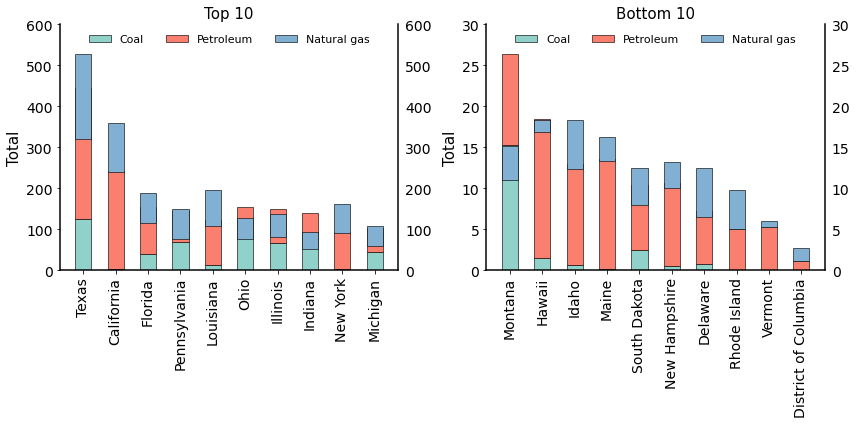

In [492]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
state_up_label = fuel_state_up.loc[:, 'State'].to_numpy()
state_up_coal = fuel_state_up.iloc[:, 1].to_numpy()
state_up_petroleum = fuel_state_up.iloc[:, 2].to_numpy()
state_up_naturalgas = fuel_state_up.iloc[:, 3].to_numpy()

state_down_label = fuel_state_down.loc[:, 'State'].to_numpy()
state_down_coal = fuel_state_down.iloc[:, 1].to_numpy()
state_down_petroleum = fuel_state_down.iloc[:, 2].to_numpy()
state_down_naturalgas = fuel_state_down.iloc[:, 3].to_numpy()

# 去除顶部和右边坐标轴
ax[0].spines['top'].set_visible(False)
ax[0].spines['bottom'].set_linewidth(1.5)
ax[0].spines['left'].set_linewidth(1.5)
ax[0].spines['right'].set_linewidth(1.5)
# 设置坐标轴字体粗细
ax[0].tick_params(labelright=True, labelsize=14)
width = 0.5
ax[0].bar(state_up_label,
          state_up_coal,
          width,
          label='Coal',
          color='#90D1C9',
          ec='k',
          lw=.6)
ax[0].bar(state_up_label,
          state_up_petroleum,
          width,
          bottom=state_up_coal,
          label='Petroleum',
          color='#FA7F6F',
          ec='k',
          lw=.6)
ax[0].bar(state_up_label,
          state_up_naturalgas,
          width,
          bottom=state_up_petroleum,
          label='Natural gas',
          color='#82B0D2',
          ec='k',
          lw=.6)
ax[0].legend(fontsize=11, frameon=False, loc='upper center', ncol=4)
ax[0].set_ylabel('Total', fontsize=15)
ax[0].set_title('Top 10', fontsize=15)
ax[0].set_ylim(0, 600)
labels_1 = ax[0].set_xticklabels(labels=state_up_label, rotation=90)

# 去除顶部和右边坐标轴
ax[1].spines['top'].set_visible(False)
ax[1].spines['bottom'].set_linewidth(1.5)
ax[1].spines['left'].set_linewidth(1.5)
ax[1].spines['right'].set_linewidth(1.5)
# 设置坐标轴字体粗细和刻度位置
ax[1].tick_params(labelright=True, labelsize=14)
# 绘制柱状图
width = 0.5
ax[1].bar(state_down_label,
          state_down_coal,
          width,
          label='Coal',
          color='#90D1C9',
          ec='k',
          lw=.6)
ax[1].bar(state_down_label,
          state_down_petroleum,
          width,
          bottom=state_down_coal,
          label='Petroleum',
          color='#FA7F6F',
          ec='k',
          lw=.6)
ax[1].bar(state_down_label,
          state_down_naturalgas,
          width,
          bottom=state_down_petroleum,
          label='Natural gas',
          color='#82B0D2',
          ec='k',
          lw=.6)

ax[1].legend(fontsize=11, frameon=False, loc='upper center', ncol=4)
ax[1].set_ylabel('Total', fontsize=15)
ax[1].set_title('Bottom 10', fontsize=15)
ax[1].set_ylim(0, 30)
labels_2 = ax[1].set_xticklabels(labels=state_down_label, rotation=90)

plt.tight_layout()
plt.savefig(
    '各燃料前十组成.jpg',
    dpi=300,
)


## Picture 4

In [493]:
sector = pd.read_excel('ProblemCData/sectors_2016.xlsx').iloc[3:-2,:]
column = [
    'State', 'Commercial', 'Electric power', 'Residential', 'Industrial',
    'Transportation', 'Total', 'Commercial', 'Electric power', 'Residential',
    'Industrial', 'Transportation'
]
sector.columns = column
# 重置索引
sector = sector.reset_index(drop=True)
print(sector.shape)
# 选择排名前十和倒十的所有州
sector_state_up = sector.sort_values(by='Total',ascending=False).iloc[:10,:]
sector_state_down = sector.sort_values(by='Total',ascending=False).iloc[-10:,:]
# 重置索引
sector_state_up = sector_state_up.reset_index(drop=True)
sector_state_down = sector_state_down.reset_index(drop=True)
sector_state_down


(51, 12)


,State,Commercial,Electric power,Residential,Industrial,Transportation,Total,Commercial,Electric power,Residential,Industrial,Transportation
0,Montana,1.380632,15.949142,1.458211,3.819399,7.851782,30.459166,0.045327,0.523624,0.047874,0.125394,0.257781
1,Hawaii,0.328298,6.577085,0.044245,1.328324,10.166514,18.444466,0.017799,0.356589,0.002399,0.072017,0.551196
2,Idaho,1.366309,1.253994,1.632627,3.369123,10.759856,18.38191,0.074329,0.068219,0.088817,0.183285,0.58535
3,Maine,1.617607,1.493373,2.924834,1.504293,8.921668,16.461775,0.098264,0.090718,0.177674,0.091381,0.541963
4,South Dakota,0.736651,2.611563,0.952032,3.87657,6.818204,14.995021,0.049126,0.174162,0.06349,0.258524,0.454698
5,New Hampshire,1.386967,2.36788,2.518945,0.752669,6.72645,13.752911,0.100849,0.172173,0.183157,0.054728,0.489093
6,Delaware,0.926894,3.584555,0.837325,3.352864,4.607906,13.309544,0.069641,0.269322,0.062912,0.251914,0.346211
7,Rhode Island,0.859306,2.574955,1.814062,0.630245,3.870909,9.749477,0.088139,0.264112,0.186068,0.064644,0.397038
8,Vermont,0.854399,0.004088,1.302583,0.424184,3.369677,5.954931,0.143477,0.000686,0.21874,0.071232,0.565863
9,District of Columbia,0.944294,0,0.638596,0.031126,1.149896,2.763911,0.341651,0,0.231048,0.011262,0.416039


C:\Users\Xu\AppData\Local\Temp/ipykernel_3036/2716565902.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  labels_1 = ax[0].set_xticklabels(labels=state_up_label, rotation=90)
C:\Users\Xu\AppData\Local\Temp/ipykernel_3036/2716565902.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  labels_2 = ax[1].set_xticklabels(labels=state_down_label, rotation=90)


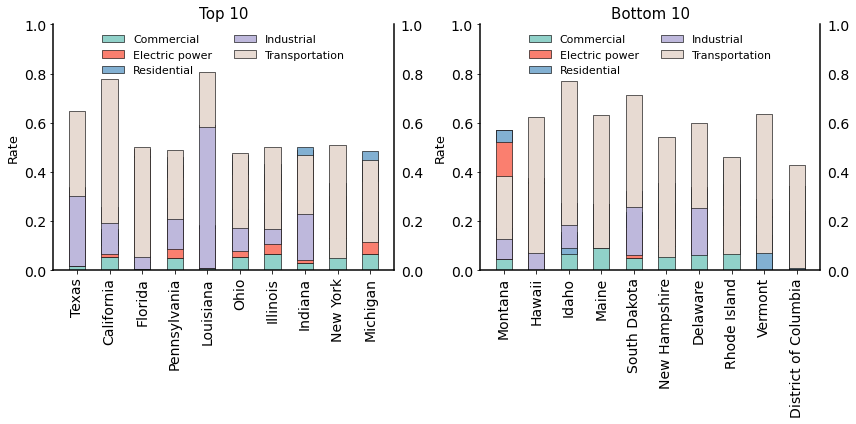

In [497]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
state_up_label = sector_state_up.loc[:, 'State'].to_numpy()
state_up_Commercial	= sector_state_up.iloc[:, 7].to_numpy()
state_up_Electricpower = sector_state_up.iloc[:, 8].to_numpy()
state_up_Residential = sector_state_up.iloc[:, 9].to_numpy()
state_up_Industrial = sector_state_up.iloc[:, 10].to_numpy()
state_up_Transportation= sector_state_up.iloc[:, 11].to_numpy()

state_down_label = sector_state_down.loc[:, 'State'].to_numpy()
state_down_Commercial = sector_state_down.iloc[:, 7].to_numpy()
state_down_Electricpower  = sector_state_down.iloc[:, 8].to_numpy()
state_down_Residential = sector_state_down.iloc[:, 9].to_numpy()
state_down_Industrial = sector_state_down.iloc[:, 10].to_numpy()
state_down_Transportation= sector_state_down.iloc[:, 11].to_numpy()


# 去除顶部和右边坐标轴
ax[0].spines['top'].set_visible(False)
ax[0].spines['bottom'].set_linewidth(1.5)
ax[0].spines['left'].set_linewidth(1.5)
ax[0].spines['right'].set_linewidth(1.5)
# 设置坐标轴字体粗细
ax[0].tick_params(labelright = True,labelsize=14)
width = 0.5
ax[0].bar(state_up_label, state_up_Commercial, width, label='Commercial',color='#90D1C9',ec='k',lw=.6)
ax[0].bar(state_up_label, state_up_Electricpower, width,  bottom=state_up_Commercial, label='Electric power',color='#FA7F6F',ec='k',lw=.6)
ax[0].bar(state_up_label, state_up_Residential, width,  bottom=state_up_Electricpower, label='Residential',color='#82B0D2',ec='k',lw=.6)
ax[0].bar(state_up_label, state_up_Industrial, width,  bottom=state_up_Residential, label='Industrial',color='#BEB8DC',ec='k',lw=.6)
ax[0].bar(state_up_label, state_up_Transportation, width,  bottom=state_up_Industrial, label='Transportation',color='#E7DAD2',ec='k',lw=.6)
ax[0].set_ylim(0,1)
ax[0].legend(fontsize=11,frameon=False,loc='upper center',ncol=2)
ax[0].set_ylabel('Rate',fontsize=13)
ax[0].set_title('Top 10', fontsize=15)
labels_1 = ax[0].set_xticklabels(labels=state_up_label, rotation=90)



# 去除顶部和右边坐标轴
ax[1].spines['top'].set_visible(False)
ax[1].spines['bottom'].set_linewidth(1.5)
ax[1].spines['left'].set_linewidth(1.5)
ax[1].spines['right'].set_linewidth(1.5)
# 设置坐标轴字体粗细和刻度位置
ax[1].tick_params(labelright = True,labelsize=14)
# 绘制柱状图
width = 0.5
ax[1].bar(state_down_label, state_down_Commercial, width, label='Commercial',color='#90D1C9',ec='k',lw=.6)
ax[1].bar(state_down_label, state_down_Electricpower, width,  bottom=state_down_Commercial, label='Electric power',color='#FA7F6F',ec='k',lw=.6)
ax[1].bar(state_down_label, state_down_Residential, width,  bottom=state_down_Electricpower, label='Residential',color='#82B0D2',ec='k',lw=.6)
ax[1].bar(state_down_label, state_down_Industrial, width,  bottom=state_down_Residential, label='Industrial',color='#BEB8DC',ec='k',lw=.6)
ax[1].bar(state_down_label, state_down_Transportation, width,  bottom=state_down_Industrial, label='Transportation',color='#E7DAD2',ec='k',lw=.6)
ax[1].set_ylim(0,1)
ax[1].legend(fontsize=11,frameon=False,loc='upper center',ncol=2)
ax[1].set_ylabel('Rate',fontsize=13)
ax[1].set_title('Bottom 10', fontsize=15)
labels_2 = ax[1].set_xticklabels(labels=state_down_label, rotation=90)

plt.tight_layout()
plt.savefig('各部门前十组成.jpg',dpi=300,)